In [134]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import MaxNLocator

In [135]:
stocks_close = pd.read_csv("Googlefinance_stocks - Close_values.csv")
stocks_open = pd.read_csv("Googlefinance_stocks - Open_values.csv")
#stocks_volume = pd.read_csv("Googlefinance_stocks - Volume_values.csv")

# Change Goog_open date to [Date, 9:30:00]
for i in range(len(stocks_open)):
    stocks_open.iloc[i, 0] = stocks_open.iloc[i, 0][:-9] + " 09:30:00"
    #stocks_volume.iloc[i, 0] = stocks_volume.iloc[i, 0][:-9]

stocks_close['Date'] = pd.to_datetime(stocks_close['Date'], dayfirst=True)
stocks_open['Date'] =  pd.to_datetime(stocks_open['Date'], dayfirst=True)

stocks_close = stocks_close.rename(columns={stock: stock[:-6] for stock in stocks_close.columns[1:]})
stocks_open = stocks_open.rename(columns={stock: stock[:-5] for stock in stocks_open.columns[1:]})

all_stocks = pd.concat([stocks_open, stocks_close]).sort_values(by='Date').reset_index(drop=True)


In [136]:
all_stocks_long = all_stocks.melt(id_vars='Date', var_name='Stock', value_name='Price')

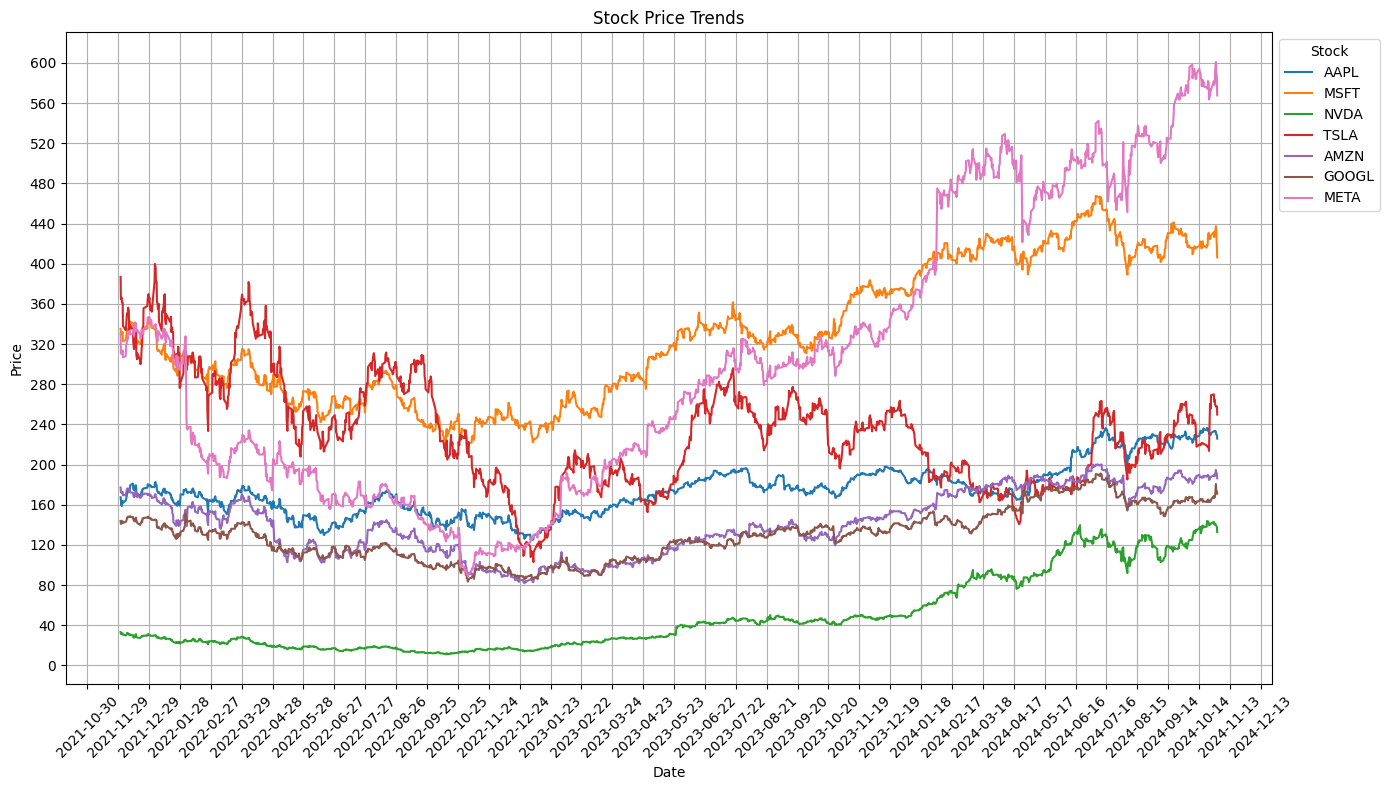

In [137]:
plt.figure(figsize=(14, 8))
sns.lineplot(data=all_stocks_long, x='Date', y='Price', hue='Stock')
plt.title('Stock Price Trends')
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid()
plt.legend(title='Stock', bbox_to_anchor=(1.00, 1), loc='upper left')
plt.xticks(rotation=45)

plt.gca().xaxis.set_major_locator(MaxNLocator(nbins=40))  # Increase the number of x-axis ticks
plt.gca().yaxis.set_major_locator(MaxNLocator(nbins=20))  # Increase the number of y-axis ticks

plt.tight_layout()
plt.show()

In [138]:
all_stocks.head(5)

,Date,AAPL,MSFT,NVDA,TSLA,AMZN,GOOGL,META
0,2021-12-01 09:30:00,167.48,335.13,33.22,386.90,177.25,144.00,330.29
1,2021-12-01 16:00:00,164.77,330.08,31.44,365.00,172.19,141.05,310.60
2,2021-12-02 09:30:00,158.74,330.30,31.21,366.35,173.00,141.25,311.40
3,2021-12-02 16:00:00,163.76,329.49,32.13,361.53,171.87,142.97,310.39
4,2021-12-03 09:30:00,164.02,331.99,32.00,361.60,172.75,143.68,313.73


In [142]:
all_stocks.to_csv("Stock_prices_2021_to_2024.csv")

In [140]:
def average_gradient(df, stock, date_time, t):
    """
    Calculate the average gradient for a given stock around a specified date and time.
    
    Parameters:
    - df (DataFrame): The dataframe containing Date, stock prices as columns.
    - stock (str): The stock symbol for which to calculate the gradient (e.g., 'AAPL').
    - date_time (str or datetime): The reference date and time as a string or datetime object.
    - t (int): Number of timesteps before and after the date_time to calculate the gradient.
    
    Returns:
    - float: The average gradient (price change per timestep).
    """
    # Ensure date_time is in datetime format
    date_time = pd.to_datetime(date_time)
    
    # Determine indices for `t` steps before and `t` steps after, even if `date_time` is not in the data
    before_indices = df.index[df['Date'] <= date_time].to_numpy()[-(t[0]+1):]  # Last `t` steps before or equal
    after_indices = df.index[df['Date'] > date_time].to_numpy()[:t[1]]      # First `t` steps after
    
    print(after_indices, before_indices)
    after_indices = np.sort(np.append(after_indices, before_indices[-1]))
    print(after_indices)

    before_prices = df.loc[before_indices, stock].to_numpy()
    avg_gradient_before = np.gradient(before_prices).mean()

    after_prices = df.loc[after_indices, stock]
    avg_gradient_after = np.gradient(after_prices).mean()

    return avg_gradient_before, avg_gradient_after


In [143]:
before, after = average_gradient(all_stocks, 'TSLA', '2023-06-02 13:30:00', (1,1))

[755] [753 754]
[754 755]
